## 练习3
下面我们做个联系，假设小明每天早上去上班要做公交车，她早上出门有70%概率坐A路，30%概率坐B路，
A到公司有6站路，每站之间运行2或着3分钟，50%概率随机，然后每站停车0.5或着1分钟，50%概率随机。
B到公司有8站路，每站之间运行1或着2分钟，50%概率随机，然后每站停车0.5或着1分钟，50%概率随机，
B车如果连续两站停留1分钟，下一段路一定是0.5分钟路程。
求小平均多长时间到公司，如果小明8点上班，那么他每天几点出门坐车，才能保证90%都不迟到？

In [4]:
import matplotlib.pyplot as plt
import random as random
import numpy as np


def ATime():
    # trip
    a = np.arange(6)
    # stop
    b = np.arange(6)
    for i in range(6):
        if random.random() <= 0.5:
            a[i] = 2
        else:
            a[i] = 3
    for i in range(6):
        if random.random() <= 0.5:
            b[i] = 0.5
        else:
            b[i] = 1
    return np.sum(a)+np.sum(b)
    AT = 0
    for i in range(6):
        AT = AT+a[i]+b[i]
    return AT

for i in range(5):
    print(ATime())




21
20
20
19
19


In [5]:
def BTime():
    a = np.arange(8)
    b = np.arange(8)
    for i in range(8):
        if random.random() <= 0.5:
            a[i] = 1
        else:
            a[i] = 2
    for i in range(8):
        for i in range(2):
            if random.random() <= 0.5:
                b[i] = 1
            else:
                b[i] = 0.5
        for i in range(3, 8):
            if b[i-2] == b[i-1] == 1:
                b[i] = 0.5
            elif random.random() <= 0.5:
                b[i] = 1
            else:
                b[i] = 0.5
    return np.sum(a)+np.sum(b)
    BT = 0
    for i in range(8):
        BT = BT+a[i]+b[i]
    return BT


for i in range(3):
    print(ATime())

16
16
16


In [6]:


def ActualTime():
    ActualTime = 0
    if random.random() <= 0.7:
        ActualTime = ATime()
    else:
        ActualTime = BTime()
    return ActualTime



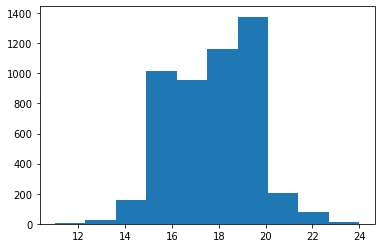

90% no late: 20
average: 17.7596


In [7]:
iteration = 5000
results = []
for i in range(iteration):
    results.append(ActualTime())
results.sort()
plt.hist(results)
plt.show()
print("90% no late: " + str(results[int(iteration*0.9)]))
print("average: "+str(np.array(results).mean()))

